<IPython.core.display.Javascript object>


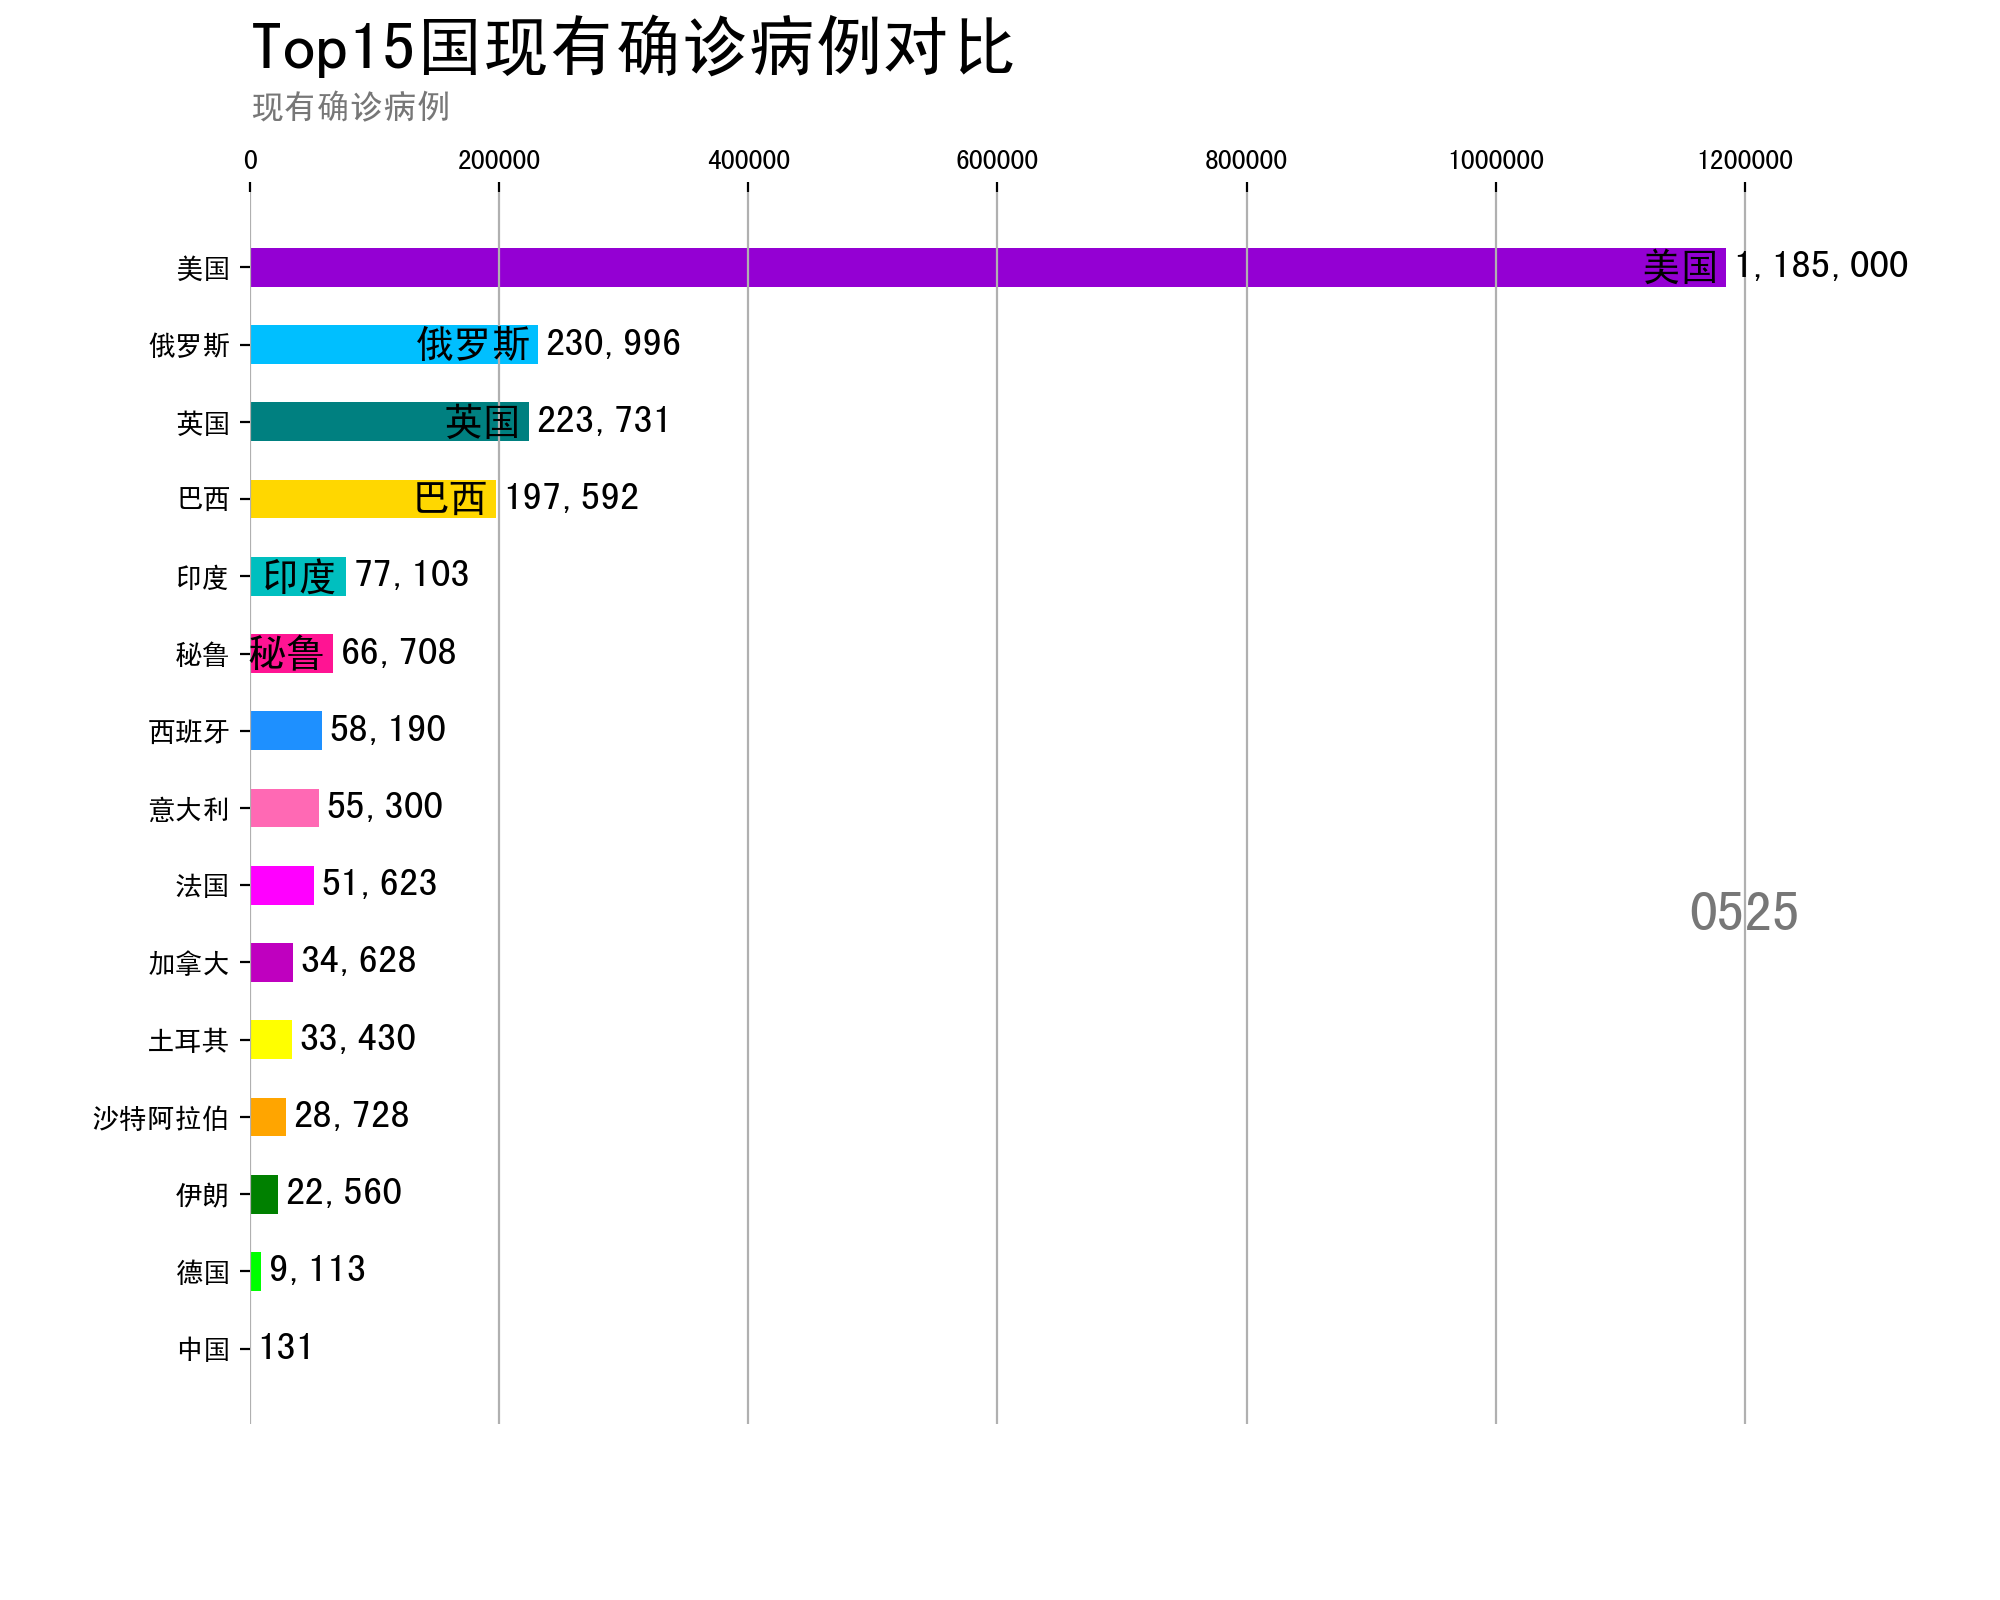

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1. 数据准备
# 1.1 加载各国疫情数据
datas = pd.read_json('../data/corona_virus.json')
# 1.2 获取最近一日累计确诊前10的国家
laest_day_datas = datas[datas.dateId == (datas.dateId.max()-1)]

# print(laest_day_datas)
# 1.3 统计累计确诊前十的国家名称
confirmed_count_top15_country_names = laest_day_datas.sort_values(by='confirmedCount', ascending=False).head(15).provinceName
# 1.4 获取累计确诊前十国家的数据
top15_countries_datas = datas[datas.provinceName.isin(confirmed_count_top15_country_names)]
# 1.5 统计前十国家每天的现有确诊数量
final_datas = top15_countries_datas.pivot_table(values='currentConfirmedCount', index='dateId', columns='provinceName')
# 1.6 没有数据的使用null进行填充
final_datas.fillna(0, inplace=True)

# print(final_datas)

fig, ax = plt.subplots(figsize=(10, 8))
# 1.3 国家颜色字典, 相同国家, 使用相同的数据条
colors = ['r', 'g', 'deepskyblue', 'm', 'c', 'yellow', 'gold', 'lime', 'hotpink', 'orange', 'fuchsia', 'deeppink', 'darkviolet', 'teal', 'dodgerblue' ]
color_map = dict(zip(final_datas.columns, colors))
# print(color_map)

# 绘制条形图
def draw_barchart(day):
    # 清空坐标系
    ax.clear()
    # 准备绘制数据
    day_data = final_datas.loc[day].sort_values()
    # 生成每一个国家对应的条形的图的颜色
    color = [color_map[name] for name in day_data.index]
    # 绘制条形图
    ax.barh(day_data.index, day_data.values, height=0.5, color=color)
    # 使用当天展示数据最大值除以200, 作为调整文本位置依据
    dx = day_data.values.max() / 200
    # 遍历国家及其疫情数据
    for i, (name, value) in enumerate(zip(day_data.index, day_data.values)):
        # 条形图偏离坐标轴10dx, 才在条形图上加入国家名称
        if value / dx > 10:
            ax.text(value-dx, i, name, size=14, weight=600, ha='right', va='center')
        # 设置条形图头上的疫情数字
        ax.text(value+dx, i, f'{value:,.0f}', size=14, ha='left', va='center' )
    # 显示日期
    ax.text(1, 0.4, str(day)[4:], transform=ax.transAxes, size=20, weight=800, ha='right', color='#777777')

    # 设置标题
    ax.text(0, 1.06, '现有确诊病例', transform=ax.transAxes, size=12, color='#777777')
    ax.text(0, 1.10, 'Top15国现有确诊病例对比', transform=ax.transAxes, size=24, weight=600)
    # 设置x轴刻度的位置在顶部
    ax.xaxis.set_ticks_position('top')
    # 设置网格
    ax.grid(which='major', axis='x', linestyle='-')
    # 去掉边框线
    plt.box(False)

draw_barchart(final_datas.index.values[0])
# 添加动画
animation = animation.FuncAnimation(fig, draw_barchart, frames=final_datas.index.values[:-1], repeat=False);
plt.show()

In [17]:
animation.save('Top15国现有确诊病例对比.mp4', fps=5)